In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy_neural_network import nn
from sklearn.utils import shuffle
from sklearn import metrics
from IPython.display import display, clear_output

# Loading and Visualizing Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data("mnist.npz")
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

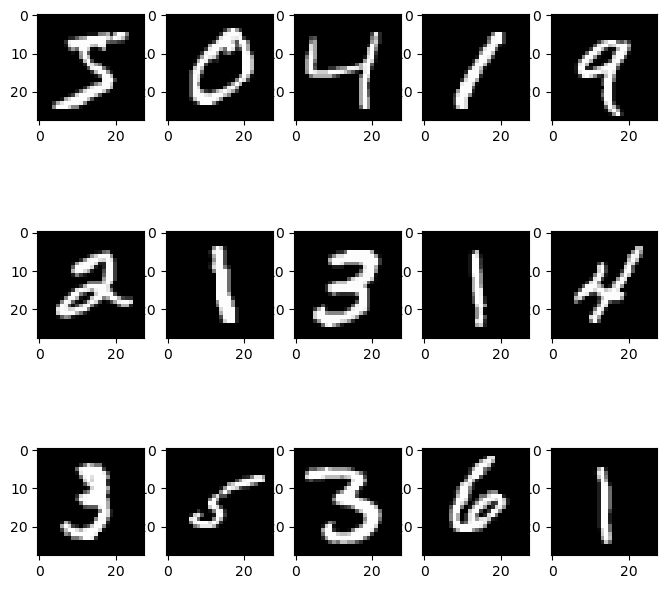

In [3]:
fig, axs = plt.subplots(3, 5, figsize=(8, 8))
img_index = 0
for i in range(3):
    for j in range(5):
        axs[i, j].imshow(x_train[img_index], cmap='gray')
        img_index += 1

In [4]:
# Normalizing the data
x_train = x_train / 255.
x_test = x_test / 255.

# Building and Training Model

In [6]:
num_features = 28 * 28
num_labels = 10

# Reshaping the data to m, num_features
x_train = np.reshape(x_train, (-1, num_features))
y_train = np.reshape(y_train, (-1, 1))

x_test = np.reshape(x_test, (-1, num_features))
y_test = np.reshape(y_test, (-1, 1))

x_train, y_train = shuffle(x_train, y_train)
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 784), (60000, 1)), ((10000, 784), (10000, 1)))

In [9]:
layers = [
    nn.DenseLayer(num_features, 0, "None", is_input= True, is_output= False),
    nn.DenseLayer(64, num_features, "sigmoid"),
    nn.DenseLayer(256, 64, "sigmoid"),
    nn.DenseLayer(256, 256, "sigmoid"),
    nn.DenseLayer(256, 256, "sigmoid"),
    nn.DenseLayer(256, 256, "sigmoid"),
    nn.DenseLayer(256, 256, "sigmoid"),
    nn.DenseLayer(256, 256, "sigmoid"),
    nn.DenseLayer(256, 256, "sigmoid"),
    nn.DenseLayer(64, 256, "sigmoid"),
    nn.DenseLayer(num_labels, 64, "sigmoid", is_input = False, is_output= True)
]
learning_rate = 0.05
lamda = 0
epochs = 70
batch_size = 512

In [10]:
history = nn.train(layers, 
            x_train, 
            y_train, 
            num_labels,
            epochs,
            batch_size,
            learning_rate,
            lamda,
            x_test,
            y_test,
            True,
            lambda x: display(x),
            lambda: clear_output(wait= True)
            )

'Epoch: 69 -> Loss: 0.08, Validation Loss: 0.1'

100%|██████████| 70/70 [13:55<00:00, 11.93s/it]


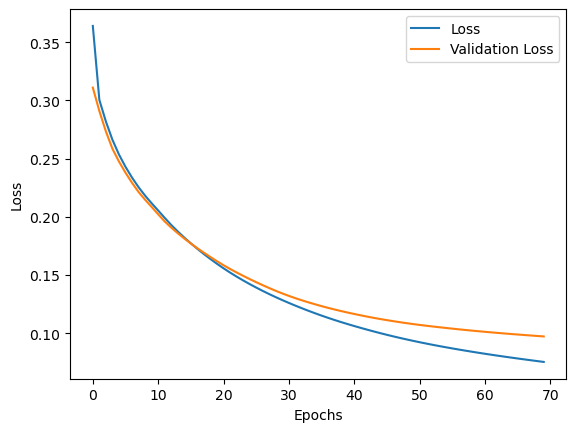

In [12]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Loss', 'Validation Loss'])

In [21]:
nn.save_model(layers, "model.h5")

In [41]:
predictions, caches = nn.forward_propagate(layers, x_test)
predictions = np.argmax(predictions, 1)

Actual: 5
Prediction: 5


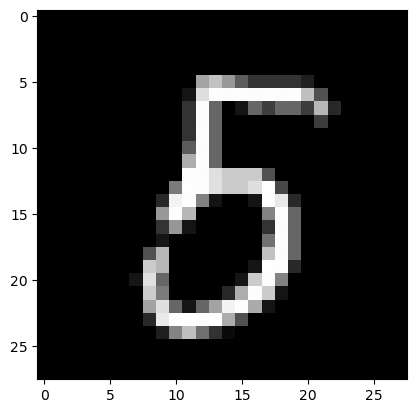

In [46]:
img_num = 45
img = np.reshape(x_test[img_num], (28, 28))
label = y_test[img_num]
print(f'Actual: {label[0]}')
print(f'Prediction: {predictions[img_num]}')
plt.imshow(img, cmap= 'gray')

# Confusion Matrix

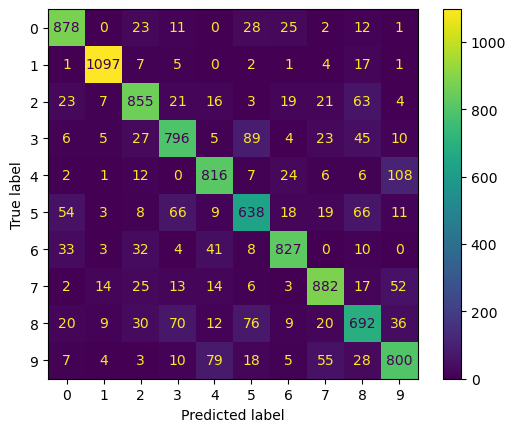

In [47]:
actual = y_test
confusion_matrix = metrics.confusion_matrix(actual, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()